<a href="https://colab.research.google.com/github/gianmy99/RW_codes/blob/main/Colab_Introductory_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# snippet: rw load rwrtools v0.5

# This is an efficient way to: 
  # install necessary packages (both those that you will use directly, and those that are dependencies)
  # load the ones you want to use in your session

# This snippet works by installing as many packages and dependencies using `apt-get` as possible, which is much faster than using install.packages()
# If not loading rsims, this should take around 50 seconds. If loading rsims, it should take around 60s.

# User Instructions:
  # IN MOST USE CASES, YOU WON'T HAVE TO MODIFY ANYTHING - just run this code block as is.
  # Parts of this snippet that the user can modify are highlighted.
  # IF YOU WANT TO USE RSIMS: uncomment the bits that install and load rsims and its dependencies.
  # IF YOU WANT TO USE LIBRARIES THAT AREN'T SPECIFIED IN THE libs_to_load VECTOR BELOW, follow these instructions:
    # specify the libraries you want to use in your research session in the libs_to_load vector.
    # specify as many of the dependecies of these libraries as you like in the other_dependencies vector - the more you are able to specify, the quicker your installation process will be.
    # it doesn't matter if there are double-ups between your other_dependencies and rwRtools_dependencies - the snippet does a check for uniqueness prior to starting the installation process.  
    # it also doesn't matter if you miss some dependencies as these will be picked up during the installation process (albeit they'll be installed slower than they otherwise would).
  # IF SOMETHING GOES WRONG: 
    # ... with installing libraries other than rsims and rwRtools, debug the install process by inspecting the msg2 object, which holds the output of the apt install process.
    # ... with the installation of rsims or rwRtools, change the calls to p_load_current_gh such that dependencies = TRUE (this will be much slower, but will catch any libraries 
      # that were missed upstream, for example if rwRtools had dependencies added later that aren't captured in the default list.)
    # if you get stuck, ask on Slack!

# How to figure out a package's dependencies? Use available.packages(). Example for getting the packages that patchwork depends upon:
# pkgs <- available.packages()
# pkgs["patchwork","Imports"]

# rwRtools dependencies (install but don't load) 
rwRtools_dependencies <- c(
  "pillar", "tibble", "rlang", "httr", "iterators", "zoo", "R.methodsS3", "callr", "foreach", 
  "xts", "stringi", "Rcpp", "R.oo", "gargle", "googleAuthR", "glue", 
  "googleCloudStorageR", "R.utils", "feather", "lubridate", "readr", "stringr", 
  "dplyr", "purrr", "magrittr", "TTR", "doParallel"
)

# libraries to load (install and load) 
##################################################
##### USER ADDS LIBRARIES TO BE LOADED HERE ######
##################################################
libs_to_load <- c("dplyr", "tidyr", "ggplot2", "lubridate", "purrr", "glue", "stringr")

# dependencies (install but don't load) 
##################################################
##### USER ADDS DEPENDENCIES HERE ################
##################################################
other_dependencies <- c(
  "generics", "lifecycle", "R6", "rlang", "tidyselect", "vctrs", "pillar", 
  "ellipsis", "digest", "gtable", "isoband", "MASS", "mgcv", "scales", "withr", 
  "stringi", "pacman", "iterators", "R.methodsS3", "openssl", "foreach", "xts", 
  "R.oo", "RcppArmadillo", "slam", "timeDate", "cccp", "Rglpk", "timeSeries",
  "tibble", "tidyr", "here", "roll", "Rcpp"
)

##################################################
#### UNCOMMENT NEXT TWO LINES IF USING RSIMS #####
##################################################
# rsims_dependencies <- c("ggplot2", "lubridate", "roll", "Rcpp")
# other_dependencies <- c(other_dependencies, rsims_dependencies)

# capitalisation of call to CRAN may not always match capitalisation of package name (eg library(doParallel) vs sudo apt install r-cran-doparallel).
install_from_cran <- gsub("^(?!R\\.)([\\w]+)", "\\L\\1", unique(c(libs_to_load, other_dependencies, rwRtools_dependencies)), perl = TRUE)  # convert to lowercase all letters other than an "R" at the start followed by "."

msg1 <- system2('sudo', args = c('apt-get', 'update'),
  stdout = TRUE,
  stderr = TRUE,
  wait = TRUE
)

msg2 <- system2(
  'sudo', 
  args = c('apt', 'install', sub('', 'r-cran-', install_from_cran, '-y --fix-missing')),
  stdout = TRUE,
  stderr = TRUE,
  wait = TRUE
)

pacman::p_load(char = libs_to_load, install = FALSE)

# install and load rwRtools from GH (sans dependencies)
pacman::p_load_current_gh("RWLab/rwRtools", dependencies = FALSE)

# install and load rsims from GH (sans dependencies) 
###################################################
###### UNCOMMENT NEXT LINE IF USING RSIMS #########
###################################################
# pacman::p_load_current_gh("Robot-Wealth/rsims", dependencies = FALSE)

# output messages from install - optional, for debugging 
#########################################################
## UNCOMMENT NEXT LINE TO DEBUG INSTALL PROCESS #########
#########################################################
# msg2

# Set chart options
options(repr.plot.width = 14, repr.plot.height=7)
theme_set(theme_bw())
theme_update(text = element_text(size = 20))



* checking for file ‘/tmp/RtmpCluOtm/remotes3c748b07be/RWLab-rwRtools-985e440/DESCRIPTION’ ... OK
* preparing ‘rwRtools’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘rwRtools_0.1.17.tar.gz’



In [2]:
# snippet: rw data auth v.0.1
rwlab_data_auth()

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-0l5tra7gl2i20iftqangp7iskte4f3s0.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AdQt8qhakpqnhA1IjwEy2-yq34SQgrIjj1uHHMS2K3TmzSIUkQ101M2FZ04


In [3]:
# snippet: rw macro quickstart v.0.1
quicksetup(pod = "Macro", path = ".")
prices %>% 
  head()

Set default bucket name to 'macro_research_pod'



Attempting download of  main_asset_classes_daily_ohlc.csv ...
Transferring main_asset_classes_daily_ohlc.csv ... data is 3.8 Mb please be patient...


ℹ Downloading main_asset_classes_daily_ohlc.csv

✔ Saved main_asset_classes_daily_ohlc.csv to ./main_asset_classes_daily_ohlc.cs…





main_asset_classes_daily_ohlc.csv successfully transferred


Rows: 48636 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ticker
dbl  (6): open, high, low, close, volume, closeadjusted
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


prices data object transferred and loaded as data.frame to Global Env


ticker,date,open,high,low,close,volume,closeadjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EMB,1995-01-04,40.22193,40.22193,40.22193,40.22193,0,20.06675
EMB,1995-01-05,40.57014,40.57014,40.57014,40.57014,0,20.24047
EMB,1995-01-06,39.89287,39.89287,39.89287,39.89287,0,19.90258
EMB,1995-01-09,39.32432,39.32432,39.32432,39.32432,0,19.61893
EMB,1995-01-10,37.45455,37.45455,37.45455,37.45455,0,18.68610
EMB,1995-01-11,37.87482,37.87482,37.87482,37.87482,0,18.89578


In [6]:
df<-rwRtools::macro_get_expiring_futures()
df %>% head()

ℹ Downloading futures_1d_ohlc.feather

✔ Saved futures_1d_ohlc.feather to macropod/futures_1d_ohlc.feather  ( 846 Mb )





File successfully transferred


ticker,contract_name,date,open,high,low,close,volume,open_interest,tick_size,currency,point_value,margin,type,exchange
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
6A-1987H,Australian Dollar March 1987,1987-01-13,0.6460,0.6470,0.6420,0.6422,1854,915,5e-05,USD,1e+05,2200,Currency,CME
6A-1987H,Australian Dollar March 1987,1987-01-14,0.6321,0.6333,0.6288,0.6299,1446,930,5e-05,USD,1e+05,2200,Currency,CME
6A-1987H,Australian Dollar March 1987,1987-01-15,0.6400,0.6401,0.6387,0.6389,539,786,5e-05,USD,1e+05,2200,Currency,CME
6A-1987H,Australian Dollar March 1987,1987-01-16,0.6408,0.6420,0.6408,0.6417,537,964,5e-05,USD,1e+05,2200,Currency,CME
6A-1987H,Australian Dollar March 1987,1987-01-19,0.6416,0.6450,0.6416,0.6435,506,866,5e-05,USD,1e+05,2200,Currency,CME
6A-1987H,Australian Dollar March 1987,1987-01-20,0.6550,0.6555,0.6500,0.6500,368,951,5e-05,USD,1e+05,2200,Currency,CME


In [7]:
head(prices)

ticker,date,open,high,low,close,volume,closeadjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EMB,1995-01-04,40.22193,40.22193,40.22193,40.22193,0,20.06675
EMB,1995-01-05,40.57014,40.57014,40.57014,40.57014,0,20.24047
EMB,1995-01-06,39.89287,39.89287,39.89287,39.89287,0,19.90258
EMB,1995-01-09,39.32432,39.32432,39.32432,39.32432,0,19.61893
EMB,1995-01-10,37.45455,37.45455,37.45455,37.45455,0,18.68610
EMB,1995-01-11,37.87482,37.87482,37.87482,37.87482,0,18.89578


In [8]:
prices %>% distinct(ticker)

ticker
<chr>
EMB
GLD
IEF
TLT
VEA
VTI
VWO


In [9]:
prices %>% group_by(ticker) %>%
summarise(
  start = (first(date)),
  end = (last(date))
)


ticker,start,end
<chr>,<date>,<date>
EMB,1995-01-04,2022-08-08
GLD,1995-01-04,2022-08-08
IEF,1995-01-04,2022-08-08
TLT,1995-01-04,2022-08-08
VEA,1995-01-04,2022-08-08
VTI,1995-01-04,2022-08-08
VWO,1995-01-04,2022-08-08


In [12]:
# snippet: rw macro calc periodic returns v.0.1
# Calculate log and simple returns at the same periodicity as your data.
# Assumes there are no gaps in your data and your price column is closeadjusted (as it is in default macro pod ETF price data) 
returns <- prices %>%
  group_by(ticker) %>%
  arrange(date) %>%
  mutate(log_return = log(closeadjusted / lag(closeadjusted, n = 1))) %>%
  mutate(simple_return = closeadjusted / lag(closeadjusted, n = 1) - 1) %>%
  na.omit() %>%
  ungroup()

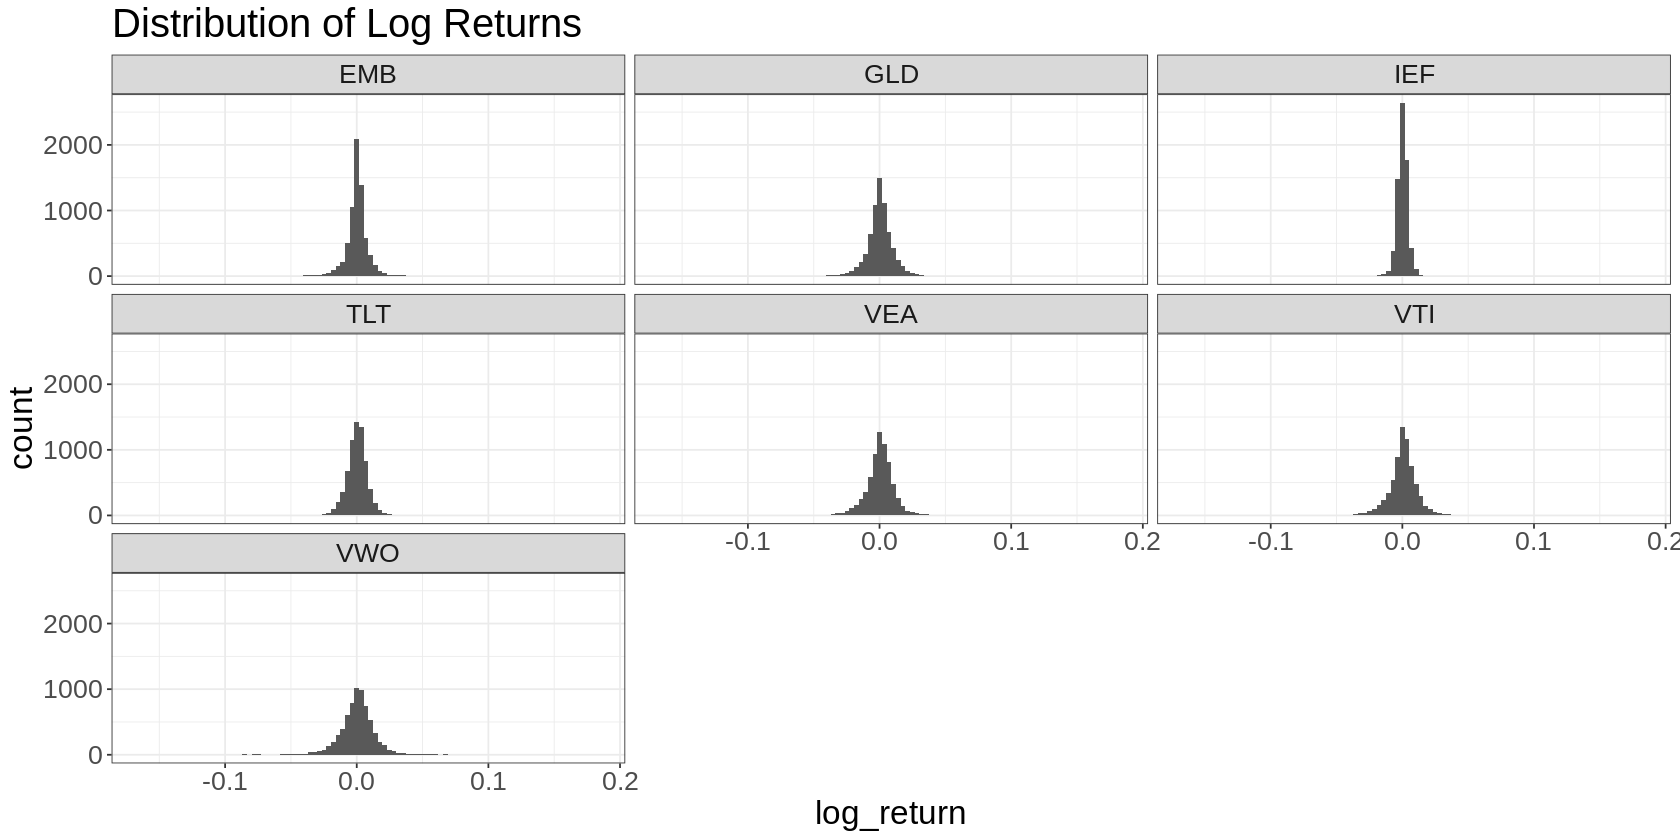

In [13]:
# snippet: rw crypto plot return histogram v.0.1
returns %>%
  ggplot(aes(x = log_return)) +
    geom_histogram(position = 'identity', bins = 100) +
    ggtitle('Distribution of Log Returns') +
    facet_wrap(~ticker)

In [16]:
# function for calculating the ewma of a vector v0.1
ewma <- function(x, lambda) {
  ewma = vector(mode = "double", length = length(x))
  ewma[1] = x[1]
  for(i in 2:length(x)) {
    ewma[i]  = (1 - lambda)*x[i] + lambda*ewma[i-1]
  }
  ewma
}

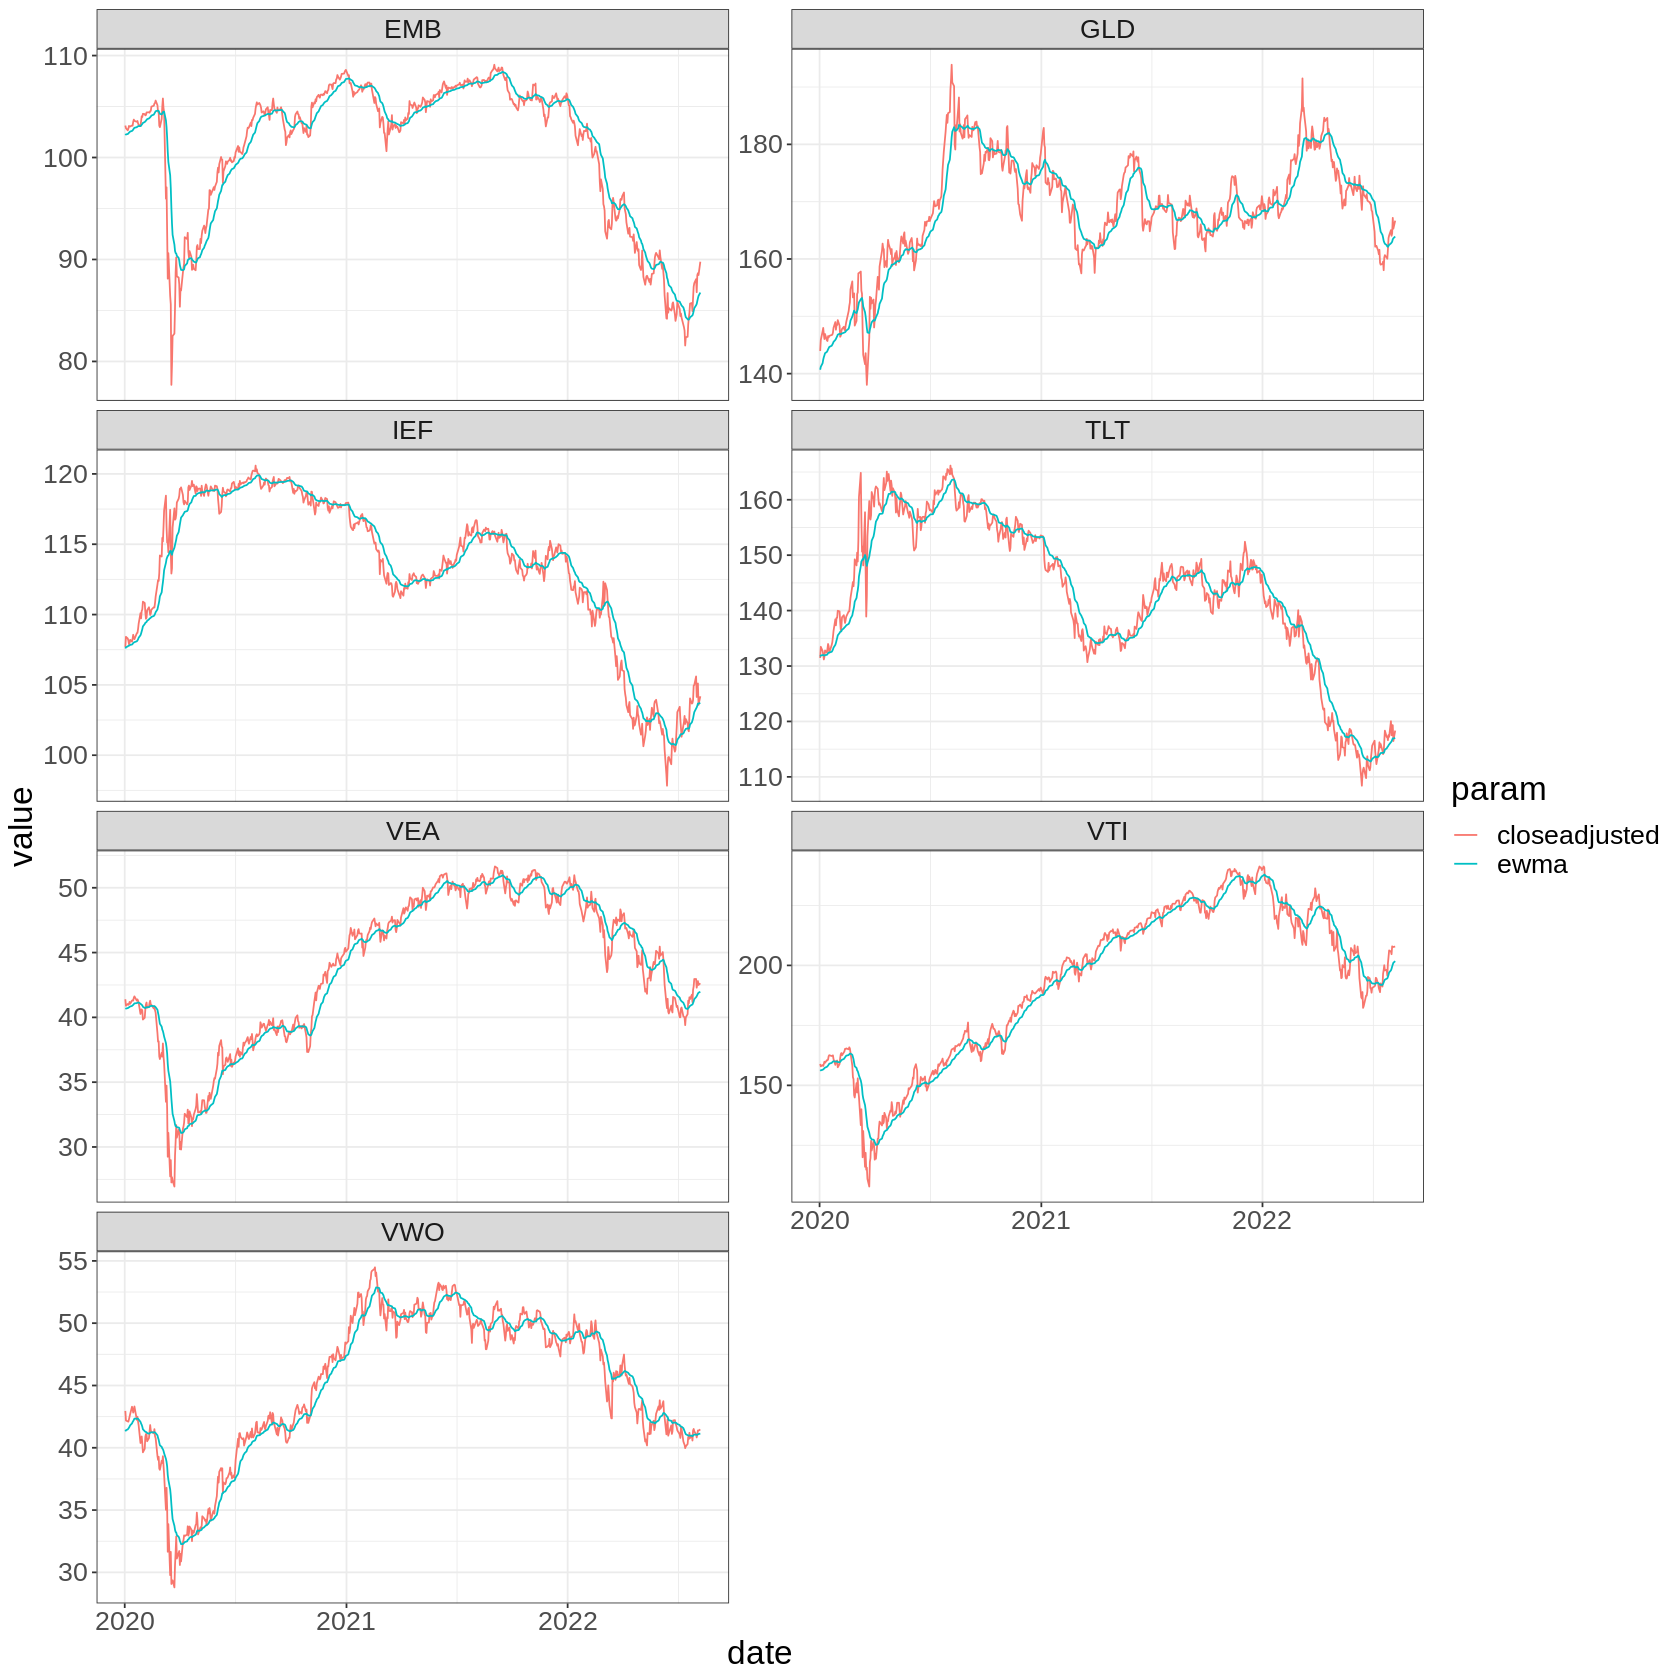

In [23]:
options(repr.plot.width = 14, repr.plot.height=14)

prices %>% 
group_by(ticker) %>%
arrange(date) %>% 
 mutate(ewma = ewma(closeadjusted,0.9)) %>%
 select(ticker,date,closeadjusted,ewma) %>%
 pivot_longer(cols = c(closeadjusted,ewma),names_to = "param",
 values_to = "value") %>%
 filter ( date >= '2020-01-01') %>%
 ggplot(aes( x = date, y = value,colour = param)) +
 geom_line() +
 facet_wrap(~ticker,ncol = 2,scales = "free_y")

 options(repr.plot.width = 14, repr.plot.height=14)
